Two different way:
* closed-form equation
* Gradient Descent梯度下降

# Linear Regression

Easy!

MSE = RMSE

## The Normal Equation

$$thetahat = (X.T * X) ^ -1 * X.T * y$$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X = 2 * np.random.rand(100, 1) # 100行，1列
y = 4 + 3 * X + np.random.rand(100,1)

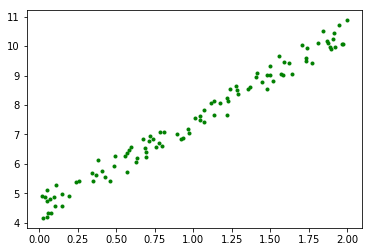

In [3]:
plt.plot(X, y, 'g.')
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
print(theta_best)

[[ 4.47184038]
 [ 3.02086043]]


In [6]:
X_new = np.array([[0], [2]]) #两个点
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

In [7]:
print(y_predict)

[[  4.47184038]
 [ 10.51356123]]


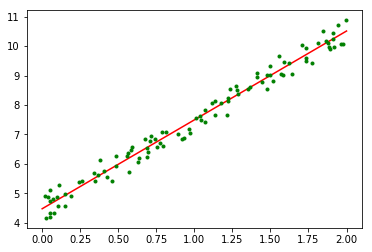

In [8]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'g.')
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 4.47184038]), array([[ 3.02086043]]))

In [10]:
lin_reg.predict(X_new)

array([[  4.47184038],
       [ 10.51356123]])

## Computational Complexity

* normal equation 时间复杂度成指数增长

## Gradient Descent

* MSE cost function for a linear model happends to be a convex function

* 梯度下降是能够达到最小值的
* 缩放不同 形状不同更不容易收敛(make sure all features have a similar scale)

## Batch Gradient Descent

In [23]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.rand(2, 1)

for _ in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [12]:
print(theta)

[[ 4.47184038]
 [ 3.02086043]]


# Stochastic Gradient Descent

In [28]:
#simulated annealing :学习率会随着运行变小

n_epochs = 50
t0, t1 = 5, 50
m = 100

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        rand_index = np.random.randint(m)
        xi = X_b[rand_index:rand_index+1]
        yi = y[rand_index:rand_index+1]
        grad = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * grad

In [29]:
theta

array([[ 4.47381627],
       [ 3.03328768]])

In [39]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [40]:
sgd_reg.intercept_, sgd_reg.coef_

(array([ 4.467408]), array([ 3.01445501]))

# Mini-batch Gradient Descent

Batch GD 能够达到最小值 , mini 和 随机 都是在最小值周围徘徊 要选择好的Learn schedule

# Polynomial Regression

In [3]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(42)

In [4]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

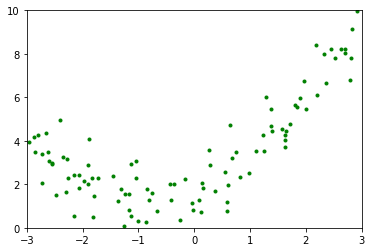

In [33]:
%matplotlib inline
plt.plot(X, y, 'g.')
plt.axis([-3, 3, 0, 10])
plt.show()

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(degree=2, include_bias=False)

X_ploy = poly_feature.fit_transform(X)

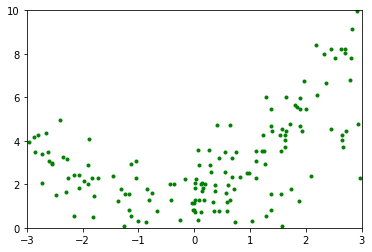

In [35]:
plt.plot(X_ploy, y, 'g.')
plt.axis([-3, 3, 0, 10])
plt.show()

In [36]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_ploy, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 1.78134581]), array([[ 0.93366893,  0.56456263]]))

In [37]:
y_pred = lin_reg.predict(X_ploy)

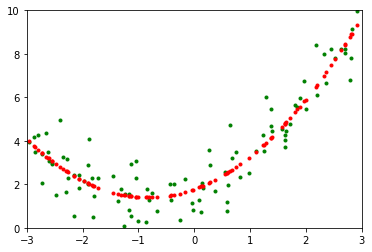

In [39]:
plt.plot(X, y, 'g.')
plt.plot(X, y_pred, 'r.')
plt.axis([-3, 3, 0, 10])
plt.show()

# Learning Curves

In [63]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
    train_error, val_error = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_test)
        train_error.append(mean_squared_error(y_train_pred, y_train[:m]))
        val_error.append(mean_squared_error(y_val_pred, y_test))
    plt.plot(np.sqrt(train_error), 'r-+', linewidth=2, label="train")
    plt.plot(np.sqrt(val_error), 'b-', linewidth=3, label='val')

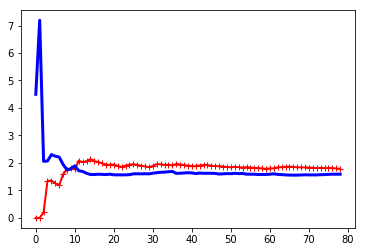

In [64]:
plot_learning_curves(lin_reg, X, y)

* underfitting

In [69]:
from sklearn.pipeline import Pipeline

polynomial_reg = Pipeline([
                    ("poly_feature",PolynomialFeatures(degree=10, include_bias=False)),
                    ("lin_reg", LinearRegression()),])

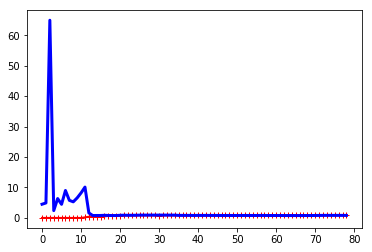

In [70]:
plot_learning_curves(polynomial_reg, X, y)

概括来说有三种错误:
* Bias
* Variance
* Irreducible

# Regularized Linear Models

降低纬度可以解决多项式过拟合

## Ridge Regression

岭回归

在cost function中加入正则化

一定要先对数据进行标准化处理 当a变大 线就趋向于平面

* close-form solution

In [9]:
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

In [10]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [11]:
ridge_reg.predict([[1.5]])

array([[ 1.98134342]])

In [13]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

D:\Software\ANA\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 1.47174624])

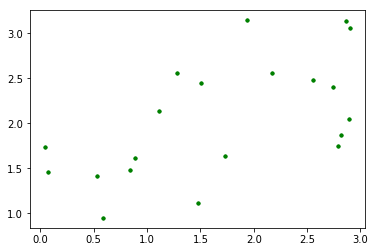

In [15]:
plt.plot(X, y, 'g.')
plt.show()

Lasso Regression 可以自动权衡好特征值

In [16]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([ 1.99759784])

## Elastic Net

尽量少用LinearRegression 可以使用Ridge作为默认 如果仅有很少的特征有效那么就用Lasso或是Elastic

当特征大于数据样本 或是特征间存在关系都应该使用Elastic Net

In [19]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=01., l1_ratio=0.5)
elastic_net.fit(X, y)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [20]:
elastic_net.predict([[1.5]])

array([ 2.05066744])

## Early Stopping

使梯度下降停在误差最小的地方

# Logistics Regression

预测

## Estimating Probabilities

* sigmoid function

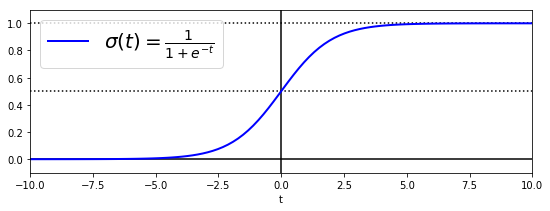

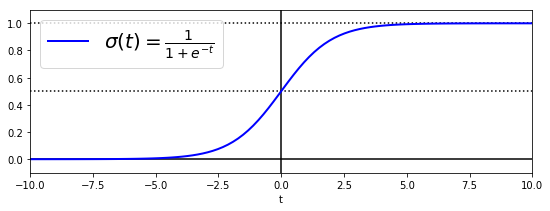

In [23]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

## Trainng and Cost Function

照着书看看就知道了

# Decison Boundaries

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [18]:
X = iris['data'][:, 3:]

In [9]:
import numpy as np

y = (iris['target'] == 2).astype(np.int32)

In [10]:
from sklearn.linear_model import LogisticRegression
lg_reg = LogisticRegression()

In [19]:
lg_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

In [21]:
X_prob = lg_reg.predict_proba(X_new)

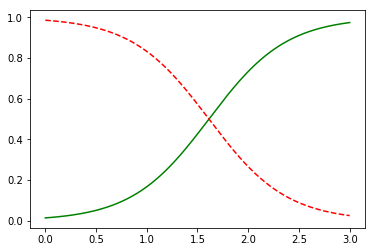

In [29]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(X_new, X_prob[:, 1], 'g-') #是的概率
plt.plot(X_new, X_prob[:, 0], 'r--') # 不是的概率
plt.show()

* 会自动添加l2正则化

参数是C c越高正则化越低

# Softmax Regression

为了支持多类别分类, 嗯 就这样。。

In [30]:
X = iris['data'][:, (2, 3)]
y = iris["target"]

In [31]:
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)

In [32]:
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
softmax_reg.predict([[5, 2]])

array([2])

# Exercises